<a href="https://colab.research.google.com/github/ABHI2410/ComputerVision/blob/main/1002033618.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 6367 Programming Assignment 1 (P1)
## Summer 2023
## Due: 11:59pm Central Time, Friday, July 7, 2023

Note: For Task 1 - Task 4 of this programming assignment, you may use any libraries you want.

### Task 1 (25 points)

Import the "colors.png" image

<img src = "./Images/colors.png" style="width:200px;height:200px">

a) Display the Red, Green and Blue color channels separately in a 1X3 plot. Use grayscale colormap for displaying the images (cmap = "gray" in matplotlib)

b) Convert the image to grayscale using the formula, grayscale = (Red + Green + Blue / 3) and display the image.

c) Apply a mask on the original image based on pixel intensity values where red pixel values are in the range (100-255) and blue and green pixel values are in the range (0-50) and show the masked image.

d) Display the Text "Red" inside the Red part of the image, "Green" inside the Green part and "Blue" inside the green part of the image. Use a reasonable font size and display the texts ("Red, "Green", "Blue") in white color.

In [351]:
#imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy

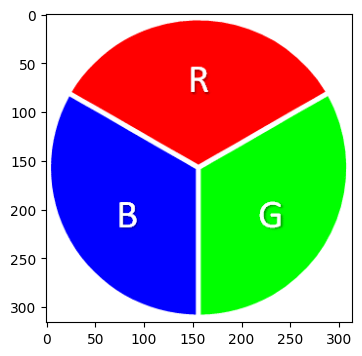

In [352]:
# Task 1
# Import colors.png
original_image = cv2.imread("./Images/colors.png")
# Change BGR format to RGB format
original_imageRGB = original_image[:,:,::-1]
# Set figure size
plt.figure(figsize=(4,4))
# Plot the image
plt.imshow(original_imageRGB)
# show the image
plt.show()


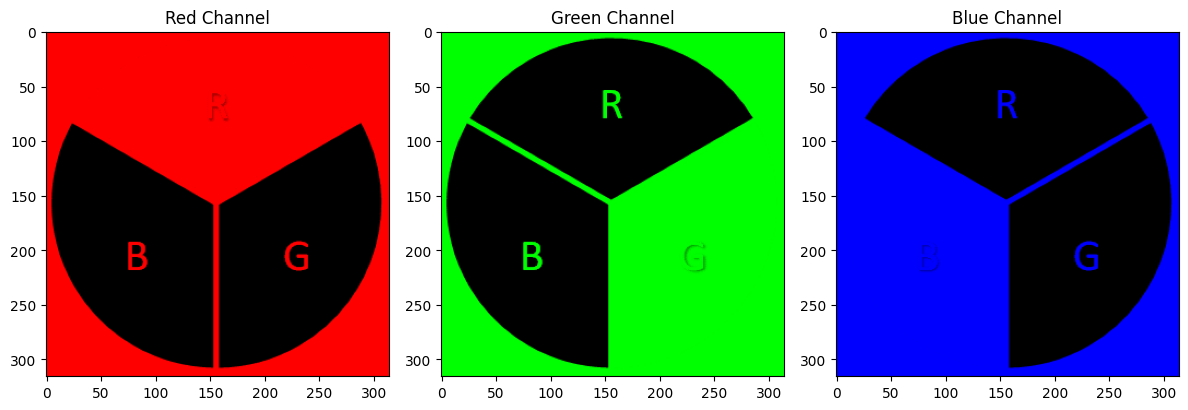

In [353]:
# Task 1 (a)
# Display red, greeen and blue channel seperatly

# Get required channel values and set rest to 0
blue_channel = original_imageRGB.copy()
blue_channel[:,:,0] = 0
blue_channel[:,:,1] = 0

green_channel = original_imageRGB.copy()
green_channel[:,:,0] = 0
green_channel[:,:,2] = 0

red_channel = original_imageRGB.copy()
red_channel[:,:,1] = 0
red_channel[:,:,2] = 0

# Create a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Display the red channel
axs[0].imshow(red_channel, cmap='gray')
axs[0].set_title('Red Channel')

# Display the green channel
axs[1].imshow(green_channel, cmap='gray')
axs[1].set_title('Green Channel')

# Display the blue channel
axs[2].imshow(blue_channel, cmap='gray')
axs[2].set_title('Blue Channel')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Text(0.5, 1.0, 'Average Gray')

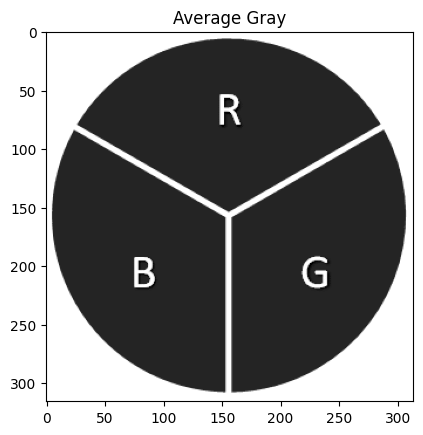

In [354]:
# Task 1 (b)
# Creating average grey


# Get the channel values
blue_channel = original_image[:,:,0]
green_channel = original_image[:,:,1]
red_channel = original_image[:,:,2]

# Using the formula provided.
Average_Gray = blue_channel/3+green_channel/3+red_channel/3

# Ploting the image
plt.imshow(Average_Gray, cmap = plt.cm.gray)

# Showing the image
plt.title("Average Gray")


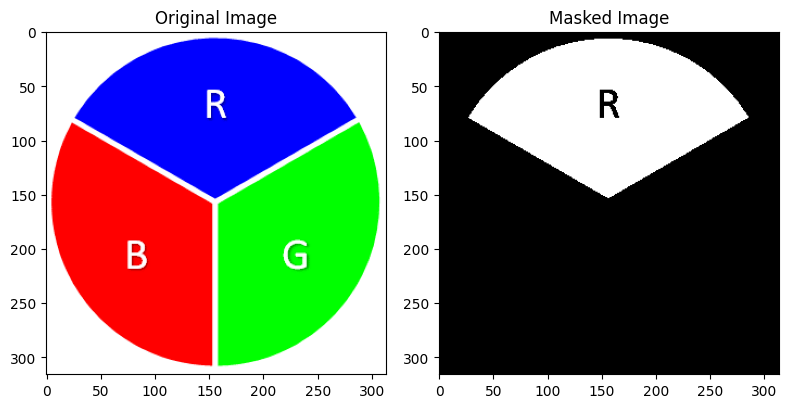

In [355]:
# Task 1 (c)
# Mask based on rgb values

# Creating the Mask
mask = cv2.inRange(original_image, (0,0,100), (50,50,255))

# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 8))

# Display the original image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')


# Display the Masked Image image
axs[1].imshow(mask, cmap = plt.cm.gray)
axs[1].set_title('Masked Image')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Text(0.5, 1.0, 'Image with Text')

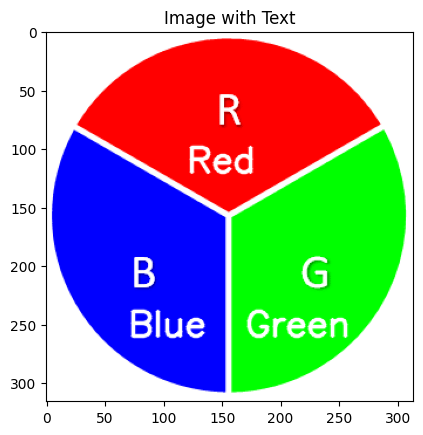

In [356]:
# Task 1 (d)
# Display color name in Text

# Get the RGB image
imageText = original_imageRGB.copy()

# Put Text Red in the Red part
cv2.putText(imageText,'Red',(120,120), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2,cv2.LINE_AA)

# Put Text Green in the Green part
cv2.putText(imageText,'Green',(170,260), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2,cv2.LINE_AA)

# Put Text Blue in the Blue part
cv2.putText(imageText,'Blue',(70,260), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2,cv2.LINE_AA)

# Display Image with Text
plt.imshow(imageText)

plt.title("Image with Text")

### Task 2 (25 points)

Import the "cameraman.jpeg" image and apply different geometric transformations to it.

a) Shift the original image 50 pixels left and 50 pixels down and display the translated image.

b) Rotate the image by 60 degree and display the result.

c) Flip the image vertically and horizontally and display the results in a 1X2 plot.

d) Crop the head part of the cameraman and display it. (no specific crop requirement, any reasonable crop of the head will be considered correct)

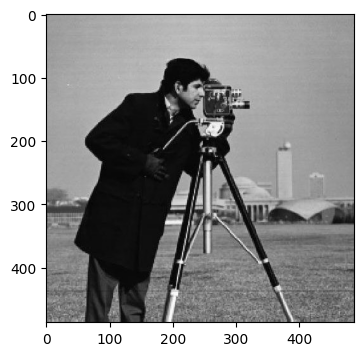

In [357]:
# Task 2
# Import Cameraman.jpeg
original_image = cv2.imread("./Images/cameraman.jpeg")

# Set the image size
plt.figure(figsize=(4,4))

# Plot the Image
plt.imshow(original_image)

# Show the Image
plt.show()

Text(0.5, 1.0, 'Translated Image Left=50 Down= 50')

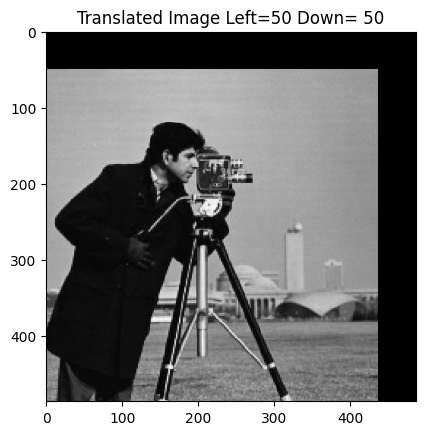

In [358]:
# Task 2 (a)
# Shifting 50 left 50 down

#identtify height and width of image
height, width = original_image.shape[:2]

#create translation matrix
translation_matrix = np.array([[1, 0, -50],[0, 1, 50]], dtype=np.float32)

#do the translation
translated_image = cv2.warpAffine(src=original_image, M=translation_matrix, dsize=(width, height))

# Show the Image
plt.imshow(translated_image)
plt.title("Translated Image Left=50 Down= 50")

Text(0.5, 1.0, 'Image Rotated by 60 degrees')

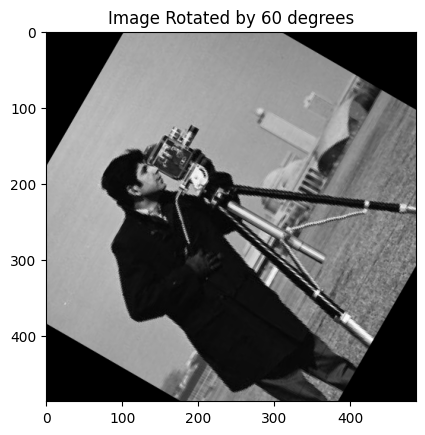

In [359]:
# Task 2 (b)
# Rotate Image by 60 degrees

# Identify the center
center = (width/2, height/2)

# Create the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=60, scale=1)

# Rotate the image
rotated_image = cv2.warpAffine(src=original_image, M=rotate_matrix, dsize=(width, height))

# Show the Image
plt.imshow(rotated_image)
plt.title("Image Rotated by 60 degrees")

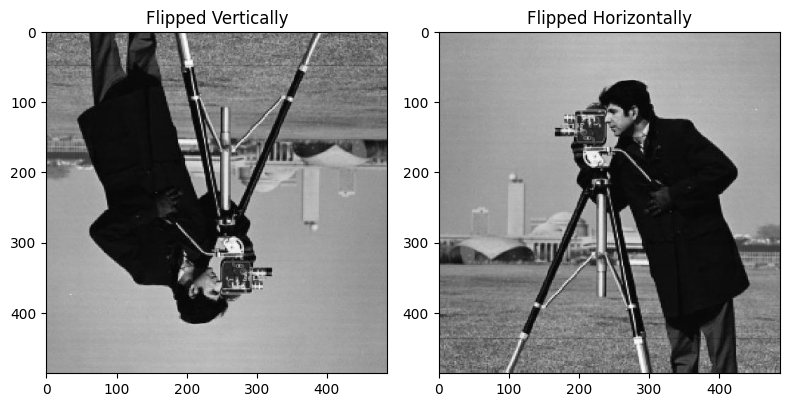

In [360]:
#Task 2 (c)
# Flip horizontal and veritical

# Flip the Image Vertically
flip_vertical = cv2.flip(original_image, 0)

# Flip the Image Horizontally
flip_horizontal = cv2.flip(original_image, 1)

# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 8))

# Display the vertically flipped image
axs[0].imshow(flip_vertical)
axs[0].set_title('Flipped Vertically')


# Display the horizontally flipped image
axs[1].imshow(flip_horizontal)
axs[1].set_title('Flipped Horizontally')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Text(0.5, 1.0, 'Crop the head of Cameraman')

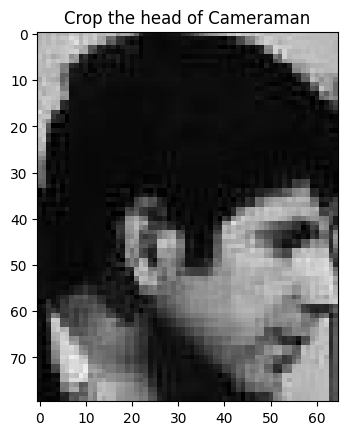

In [361]:
# Task 2 (d)
# Crop the head of cameraman

# Crop the Head area in the Image
crop = original_image[70:150,185:250]

# Show the cropped part of the Image
plt.imshow(crop)
plt.title("Crop the head of Cameraman")

### Task 3 (25 points)

Import the "cameraman.jpeg" image and

a) Perform average blur with kernel size 9X9 and 25X25.

b) Perform gaussian blur with kernel size 9X9, sigma (standard deviation of the Gaussian) of 2.0 and another gaussian blur with kernel size 25X25, sigma 15.0

c) Perform median blur with kernel size 5X5 and 15X15.

d) Resize the guassian blurred image with kernel size 25X25 and sigma 15 to 40X40 pixels, and resize the original image to 40X40 pixels.

Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered/processed images in a 1X3 grid.

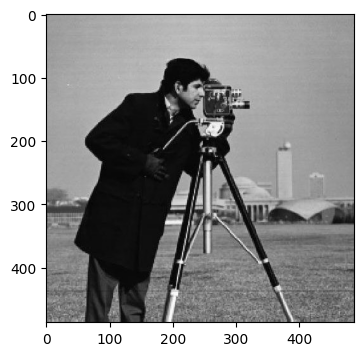

In [362]:
# Task 3
# Import Cameraman.jpeg
original_image = cv2.imread("./Images/cameraman.jpeg")

# Set teh Size of the Image
plt.figure(figsize=(4,4))

# Plot the Image
plt.imshow(original_image)

# Show the Image
plt.show()

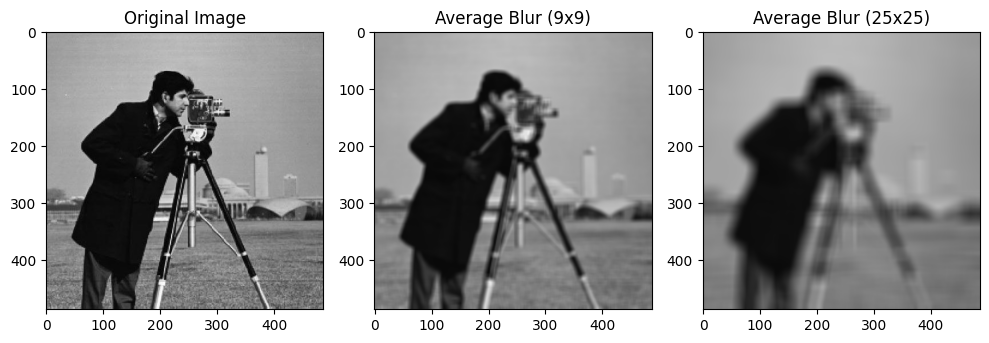

In [363]:
# Task 3 (a)
# Perform average blur with a 9x9 and 25x25 kernel

# Do Average blur for 9X9 kernel
blur_9x9 = cv2.blur(original_image, (9, 9))

# Do Average blur for 25X25 kernel
blur_25x25 = cv2.blur(original_image, (25, 25))

# Create a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(10, 8))

#Display the image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

# Display the image with a 9x9 average blur
axs[1].imshow(blur_9x9)
axs[1].set_title('Average Blur (9x9)')

# Display the image with a 25x25 average blur
axs[2].imshow(blur_25x25)
axs[2].set_title('Average Blur (25x25)')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

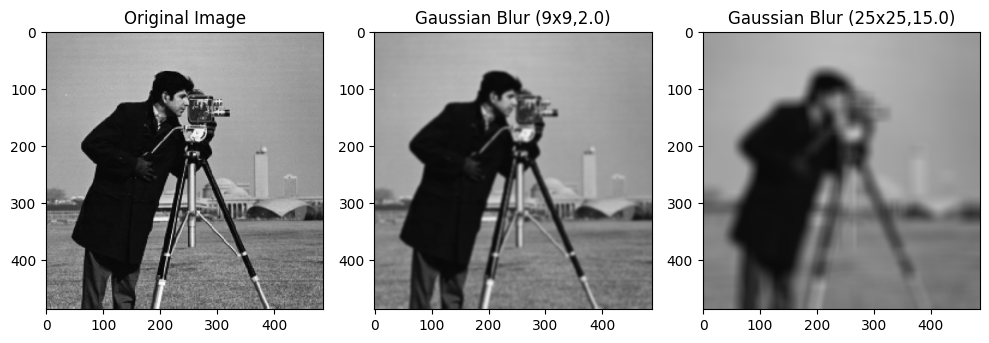

In [364]:
# Task 3 (b)

# Perform Gaussian blur with a 9x9,2  and 25X25,15 kernel

# Do Gaussian blur for 9X9 kernel size and 2.0 sigma
blur_9x9 = cv2.GaussianBlur(original_image, (9, 9), 2.0)

# Do Gaussian blur for 25X25 kernel size and 15.0 sigma
blur_25x25 = cv2.GaussianBlur(original_image, (25, 25), 15.0)

# Create a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(10, 8))

#Display the image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

# Display the image with a 9x9,2.0 Gaussian blur
axs[1].imshow(blur_9x9)
axs[1].set_title('Gaussian Blur (9x9,2.0)')

# Display the image with a 25x25,15.0 Gaussian blur
axs[2].imshow(blur_25x25)
axs[2].set_title('Gaussian Blur (25x25,15.0)')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

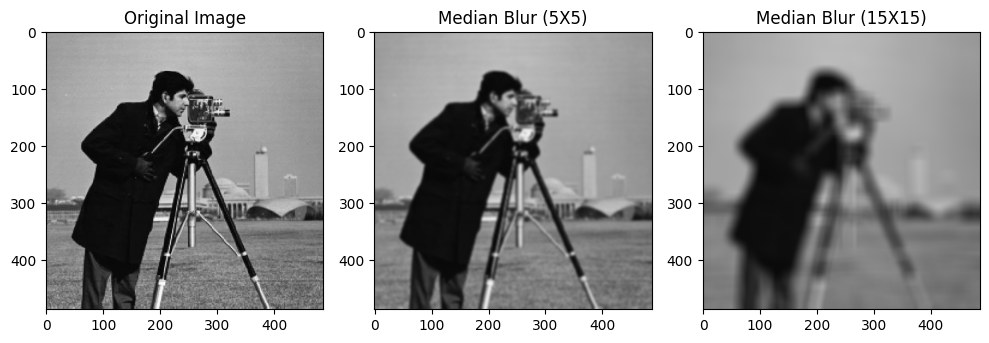

In [365]:
# Task 3 (c)
# Perform median blur with 5X5 and 15X15 kernal

# Perform median blur with a 5x5 kernel
blur_5x5 = cv2.medianBlur(original_image, 5)

# Perform median blur with a 15x15 kernel
blur_15x15 = cv2.medianBlur(original_image, 15)

# Create a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(10, 8))

#Display the image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

# Display the image with a 5x5 median blur
axs[1].imshow(blur_9x9)
axs[1].set_title('Median Blur (5X5)')

# Display the image with a 15x15 median blur
axs[2].imshow(blur_25x25)
axs[2].set_title('Median Blur (15X15)')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

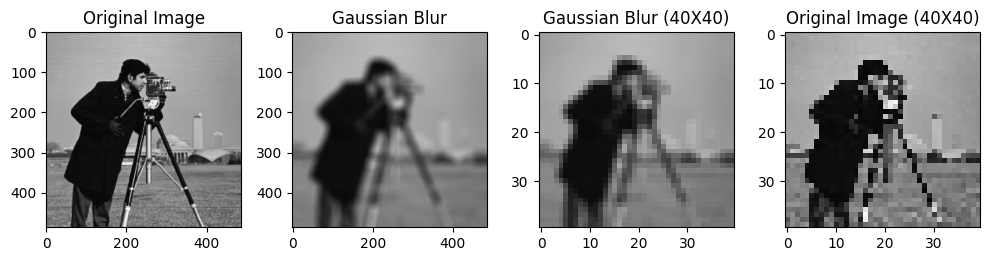

In [366]:
# Task 3 (d)
# Perform Gaussian blur and resize also resize original image

# Perform Gaussian blur with a 25x25 kernel and sigma 15
blur = cv2.GaussianBlur(original_image, (25, 25), 15)

# Resize the blurred image to 40x40 pixels
resized_blur = cv2.resize(blur, (40, 40))

# Resize the original image to 40x40 pixels
resized_image = cv2.resize(original_image, (40, 40))

# Create a 1x4 subplot
fig, axs = plt.subplots(1, 4, figsize=(10, 8))

#Display the image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

#Display the Gaussian Blur image
axs[1].imshow(blur)
axs[1].set_title('Gaussian Blur')

#Display the Gaussian Blur 40X40 image
axs[2].imshow(resized_blur)
axs[2].set_title('Gaussian Blur (40X40)')

#Display the Original 40X40 image
axs[3].imshow(resized_image)
axs[3].set_title('Original Image (40X40)')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Task 4 (25 points)

Import the "cameraman.jpeg" image and apply

a) Sobel edge detector (Apply horizontal and vertical sobel filters and display the Sobel magnitude image)

b) Prewitt edge detector (Apply horizontal and vertical prewitt filters and display the Prewitt magnitude image)

c) Laplacian edge detector

d) Canny edge detector
    
Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 1X2 plot.

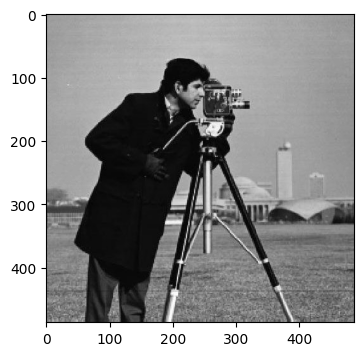

In [367]:
# Task 4
#import Cameraman.jpeg

original_image = cv2.imread("./Images/cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
grayscale_image =cv2.GaussianBlur(original_image,(5, 5), 5.0)

# Set the Image Size
plt.figure(figsize=(4,4))

# Plot the Image
plt.imshow(original_image,cmap=plt.cm.gray)

# Show the Image
plt.show()

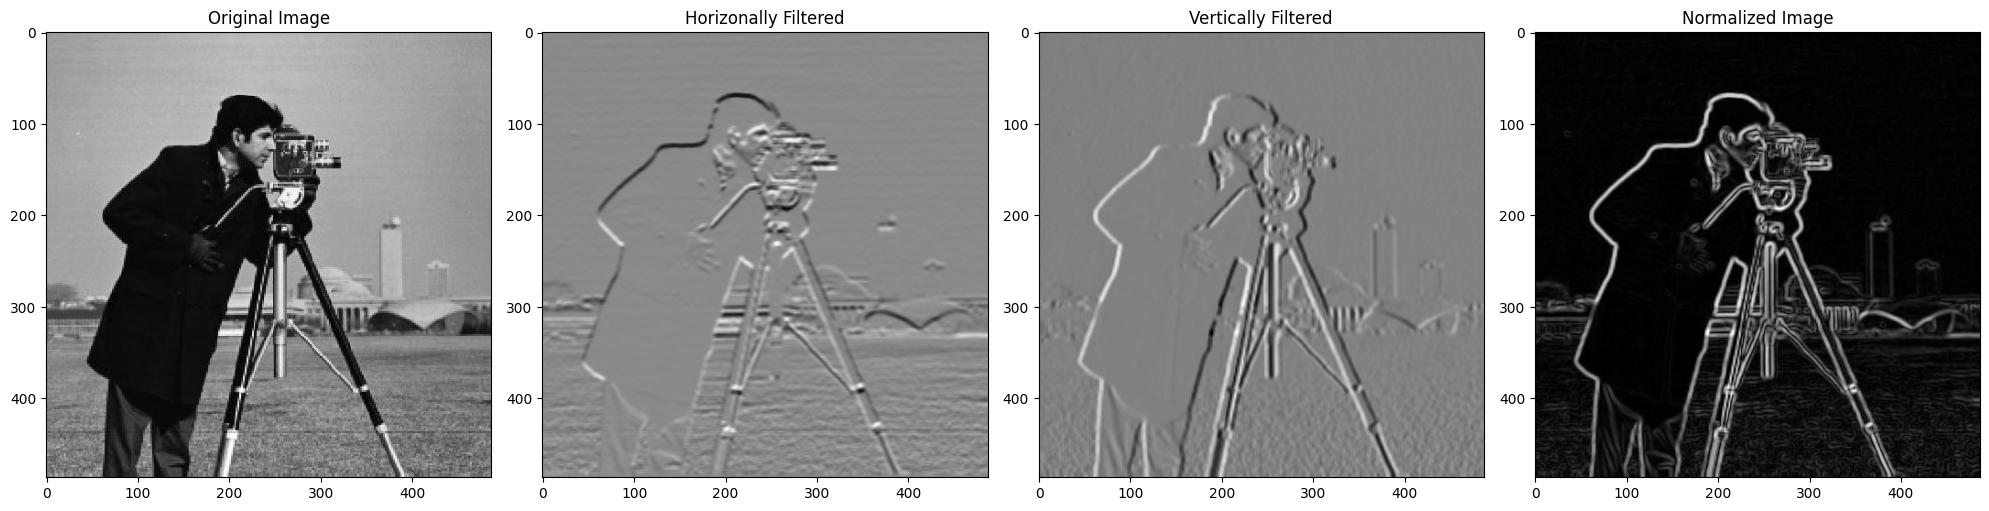

In [368]:
# Task 4 (a)
# Sobel edge detector

# Horizonal Sobel kernel
horizontal_kernel = np.array([[ 1.,  2,  1],[ 0,  0,  0],[-1,-2,-1]])

# Vertical Sobel kernel
vertical_kernel = np.array([[ -1.,  0,  1],[ -2,  0,  2],[-1,0,1]])

# Normalize the kernels
kernel_sum=abs(np.sum(horizontal_kernel))
horizontal_kernel= horizontal_kernel/kernel_sum if kernel_sum else horizontal_kernel
kernel_sum=abs(np.sum(vertical_kernel))
vertical_kernel= vertical_kernel/kernel_sum if kernel_sum else vertical_kernel

# Perform Convolution
horizontal_edge_image = scipy.ndimage.convolve(grayscale_image/255, horizontal_kernel)
vertical_edge_image = scipy.ndimage.convolve(grayscale_image/255, vertical_kernel)

# Calculate Normalized Image
magnitude_image = []

# Loop through each pixel in both horizontally filtered and Vertically filtered Image
# and Calculate the Magnitude by using square root of sum of squres
# and Normalize the Image
for i in range(len(horizontal_edge_image)):
  intermedite = []
  for j in range(len(horizontal_edge_image[i])):
    intermedite.append(np.sqrt((horizontal_edge_image[i][j] ** 2) + (vertical_edge_image[i][j] ** 2)))
  magnitude_image.append(intermedite)
magnitude_image = np.array(magnitude_image)
magnitude_image *= 255 / np.max(magnitude_image)

# Create a 1x4 subplot
fig1, axs = plt.subplots(1, 4)
fig1.set_size_inches(20,8)

# Display the image
axs[0].imshow(original_image,cmap=plt.cm.gray)
axs[0].set_title('Original Image')

# Display the Horizonally Filtered Image
axs[1].imshow(horizontal_edge_image,cmap=plt.cm.gray)
axs[1].set_title('Horizonally Filtered')

# Display the Vertically Filtered Image
axs[2].imshow(vertical_edge_image,cmap=plt.cm.gray)
axs[2].set_title('Vertically Filtered')

# Display the Normalized Combined Image
axs[3].imshow(magnitude_image,cmap=plt.cm.gray)
axs[3].set_title('Normalized Image')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

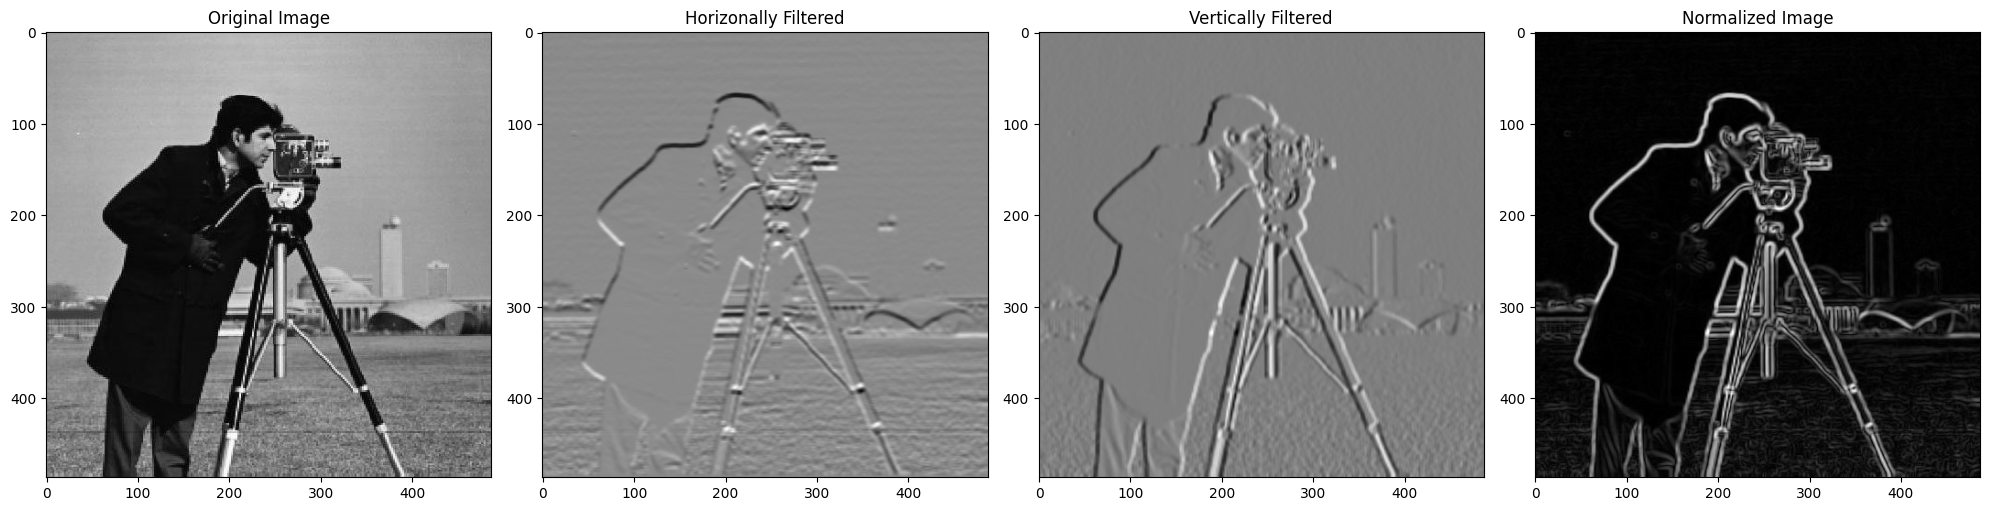

In [369]:
# Task 4 (b)
# Prewitt edge detector


# Horizonal Prewitt kernel
horizontal_kernel = np.array([[ 1,  1,  1],[ 0,  0,  0],[-1,-1,-1]])

# Vertical Prewitt kernel
vertical_kernel = np.array([[ 1,  0,  -1],[ 1,  0,  -1],[ 1,  0,  -1]])

# Normalize the kernels
kernel_sum=abs(np.sum(horizontal_kernel))
horizontal_kernel= horizontal_kernel/kernel_sum if kernel_sum else horizontal_kernel
kernel_sum=abs(np.sum(vertical_kernel))
vertical_kernel= vertical_kernel/kernel_sum if kernel_sum else vertical_kernel

# Perform Convolution
horizontal_edge_image = scipy.ndimage.convolve(grayscale_image/255, horizontal_kernel)
vertical_edge_image = scipy.ndimage.convolve(grayscale_image/255, vertical_kernel)

# Calculate Normalized Image
magnitude_image = []

# Loop through each pixel in both horizontally filtered and Vertically filtered Image
# and Calculate the Magnitude by using square root of sum of squres
# and Normalize the Image
for i in range(len(horizontal_edge_image)):
  intermedite = []
  for j in range(len(horizontal_edge_image[i])):
    intermedite.append(abs(np.sqrt((horizontal_edge_image[i][j] ** 2) + (vertical_edge_image[i][j] ** 2))))
  magnitude_image.append(intermedite)
magnitude_image = np.array(magnitude_image)
magnitude_image *= 255 / np.max(magnitude_image)

# Create a 1x4 subplot
fig1, axs = plt.subplots(1, 4)
fig1.set_size_inches(20,8)

# Display the image
axs[0].imshow(original_image,cmap=plt.cm.gray)
axs[0].set_title('Original Image')

# Display the Horizonally Filtered Image
axs[1].imshow(horizontal_edge_image,cmap=plt.cm.gray)
axs[1].set_title('Horizonally Filtered')

# Display the Vertically Filtered Image
axs[2].imshow(vertical_edge_image,cmap=plt.cm.gray)
axs[2].set_title('Vertically Filtered')

# Display the Normalized Combined Image
axs[3].imshow(magnitude_image,cmap=plt.cm.gray)
axs[3].set_title('Normalized Image')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

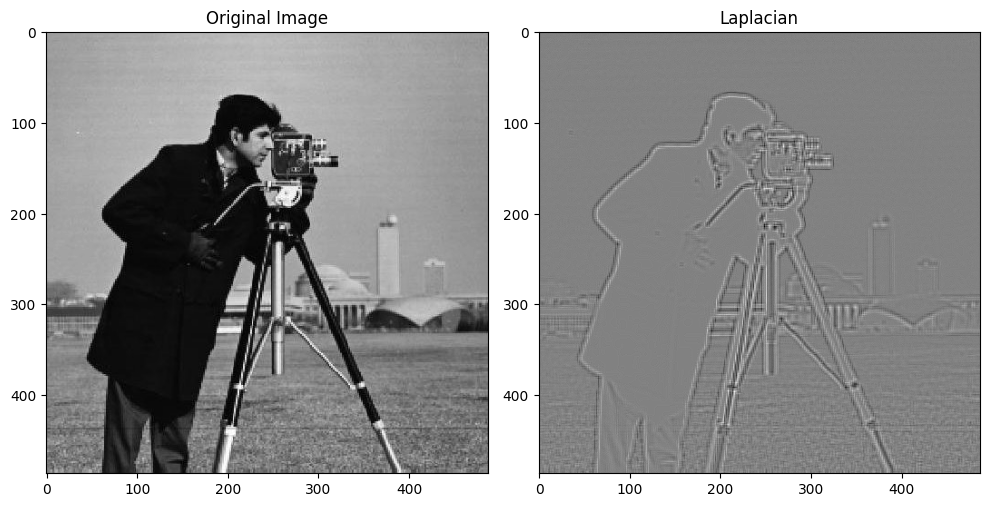

In [370]:
# Task 4 (c)
# Laplacian Edge Detector

# Laplacian Kernel
laplacian_kernel=np.array([[0,1.,0],[1,-4,1],[0,1,0]])

# Perform COnvolution
output_image = scipy.ndimage.convolve(grayscale_image/255, laplacian_kernel)

# Create a 1x2 subplot
fig1, axs = plt.subplots(1, 2)
fig1.set_size_inches(10,8)

# Display the Image
axs[0].imshow(original_image,cmap=plt.cm.gray)
axs[0].set_title('Original Image')

# Display the Laplacian Image
axs[1].imshow(output_image,cmap=plt.cm.gray)
axs[1].set_title('Laplacian')


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

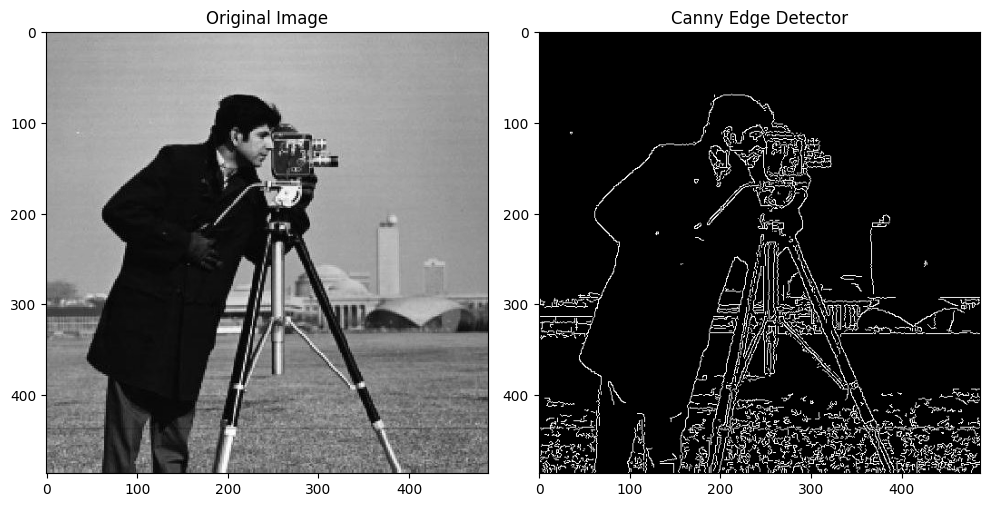

In [371]:
# Task 4 (d)
# Canny Edge Detector

# Perform Canny Edge Detector
output_image = cv2.Canny(original_image,100,200)

# Create a 1x2 subplot
fig1, axs = plt.subplots(1, 2)
fig1.set_size_inches(10,8)

# Display the Image
axs[0].imshow(original_image,cmap=plt.cm.gray)
axs[0].set_title('Original Image')

# Display the Canny Edge Detected Image
axs[1].imshow(output_image,cmap=plt.cm.gray)
axs[1].set_title('Canny Edge Detector')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Task 5 (optional - 20 points)

Implement "Canny Edge Detector" from scratch without using any library functions and compare your result with OpenCV implementation of "Canny Edge Detector"

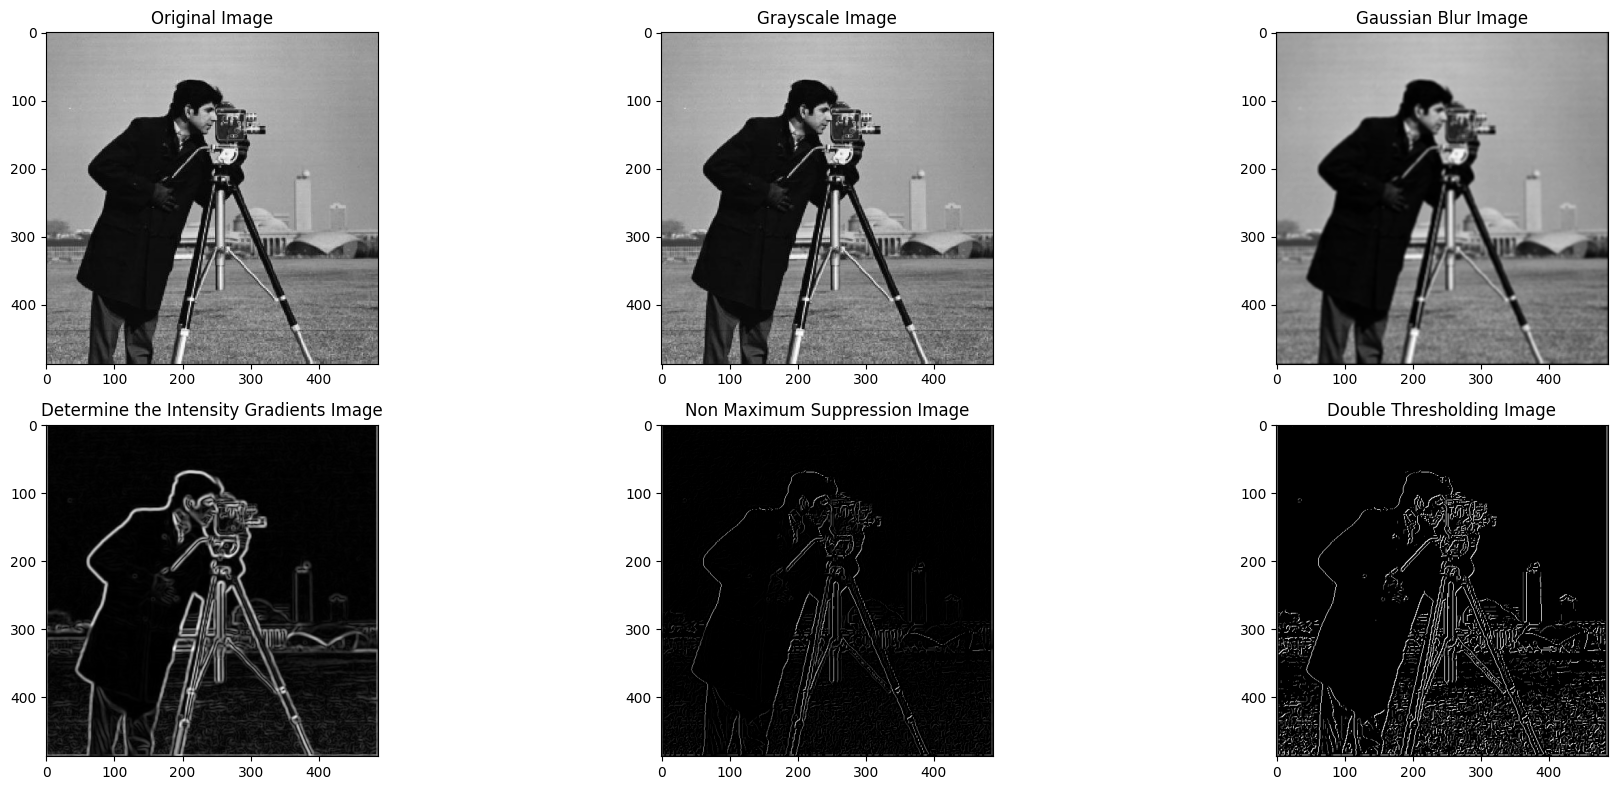

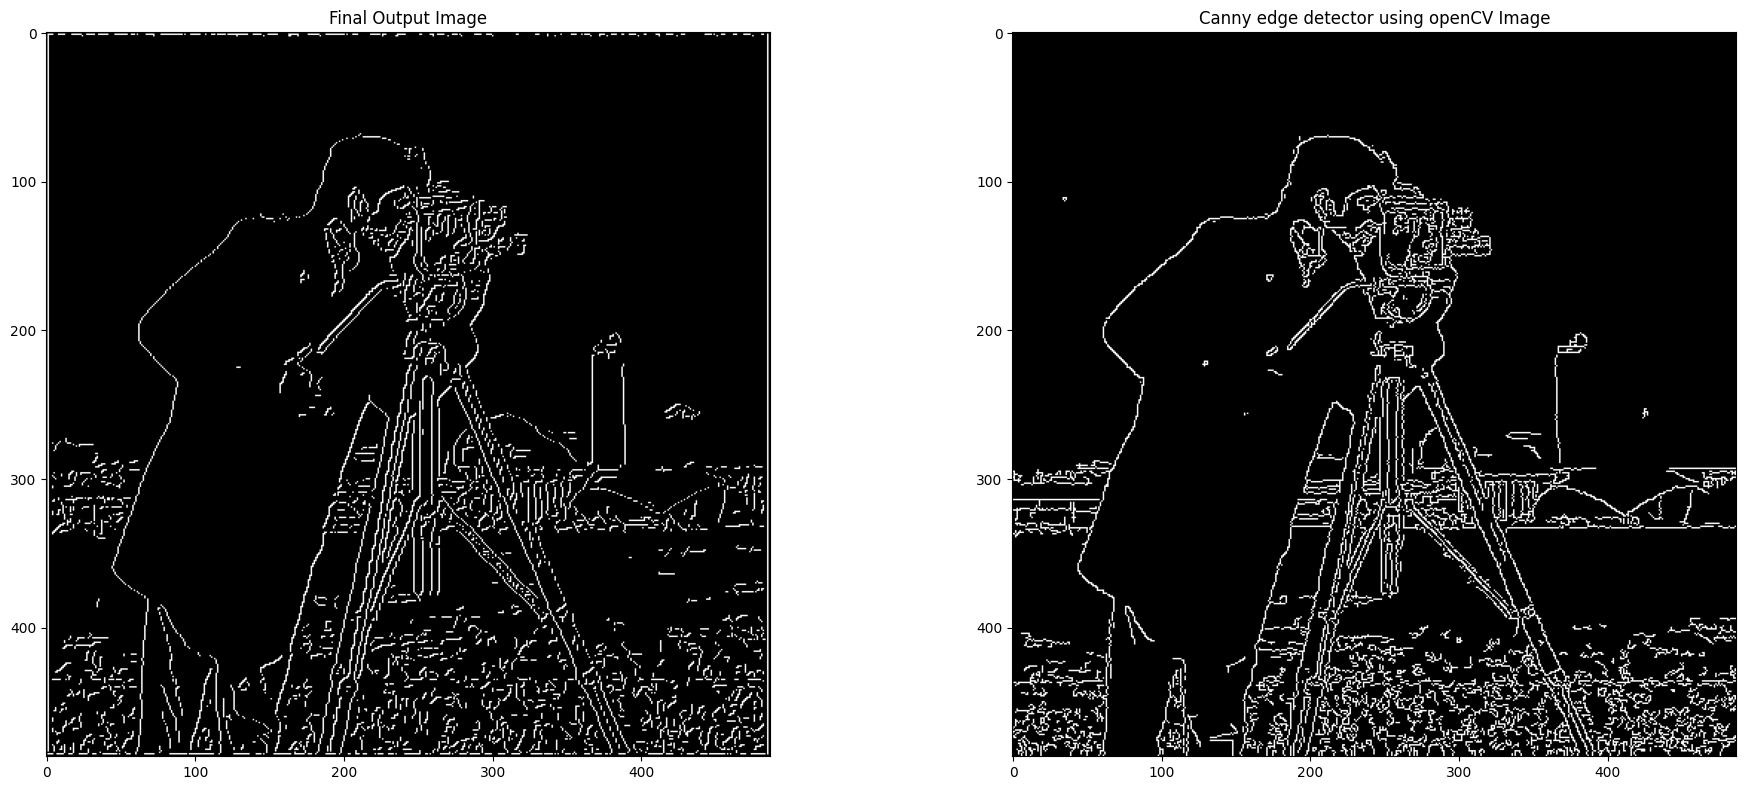

In [372]:
# Task 5
# Perform Canny Edge Detector without OpenCV function

# import image
original_image = cv2.imread("./Images/cameraman.jpeg")

# --> Step 1 Grayscale Conversion

# Get the channel values
blue_channel = original_image[:,:,0]
green_channel = original_image[:,:,1]
red_channel = original_image[:,:,2]

# Convert the Image to GrayScale
grayscale_image = red_channel/3 + green_channel/3 + blue_channel/3

# --> Step 2 Gaussian Blur

# Creating the Gaussian Kernel
sigma = 3
size = 5
mean=0
x=np.linspace(-(size // 2), size // 2, size)
gaussian_kernel= (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-((x-mean)**2)/(2*sigma**2))
gaussian_kernel_2d = np.outer(gaussian_kernel.T,gaussian_kernel.T)
gaussian_kernel_2d *=1.0/gaussian_kernel_2d.max()

# Creating the Output Image
gaussian_img = np.zeros(grayscale_image.shape)

# Applying the Gaussian Kernel to the Image
image_row, image_col = grayscale_image.shape
kernel_row, kernel_col = gaussian_kernel_2d.shape

# Determining the Padding
pad_height = int((kernel_row - 1) / 2)
pad_width = int((kernel_col - 1) / 2)

# Applying the Padding
padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = grayscale_image

# Applying the Gaussian Blur
for row in range(image_row):
        for col in range(image_col):
            gaussian_img[row, col] = np.sum(gaussian_kernel_2d * padded_image[row:row + kernel_row, col:col + kernel_col])
            gaussian_img[row, col] /= gaussian_kernel_2d.shape[0] * gaussian_kernel_2d.shape[1]

# --> Step 3 Determine the Intensity Gradients


# Horizonal Sobel kernel
horizontal_kernel = np.array([[ 1.,  2,  1],[ 0,  0,  0],[-1,-2,-1]])

# Vertical Sobel kernel
vertical_kernel = np.array([[ -1.,  0,  1],[ -2,  0,  2],[-1,0,1]])

# Normalize the kernels
kernel_sum=abs(np.sum(horizontal_kernel))
horizontal_kernel= horizontal_kernel/kernel_sum if kernel_sum else horizontal_kernel
kernel_sum=abs(np.sum(vertical_kernel))
vertical_kernel= vertical_kernel/kernel_sum if kernel_sum else vertical_kernel

# Perform Convolution
horizontal_edge_image = scipy.ndimage.convolve(gaussian_img/255, horizontal_kernel)
vertical_edge_image = scipy.ndimage.convolve(gaussian_img/255, vertical_kernel)

# Calculate Normalized Image
magnitude_image = []

# Loop through each pixel in both horizontally filtered and Vertically filtered Image
# and Calculate the Magnitude by using square root of sum of squres
# and Normalize the Image
for i in range(len(horizontal_edge_image)):
  intermedite = []
  for j in range(len(horizontal_edge_image[i])):
    intermedite.append(np.sqrt((horizontal_edge_image[i][j] ** 2) + (vertical_edge_image[i][j] ** 2)))
  magnitude_image.append(intermedite)
magnitude_image = np.array(magnitude_image)
magnitude_image *= 255 / np.max(magnitude_image)

# Determining the Direction of the Change
theta = np.arctan2(vertical_edge_image, horizontal_edge_image)

# --> Step 4 Non Maximum Suppression

# Identfying the Image shape
img_row, img_col = magnitude_image.shape

# Creating the NMS output Image
non_max_output = np.zeros(magnitude_image.shape)

# Loop through each pixel of the image and check the direction of the change
# Based of the direction of change identify the neginbours of the pixel
# Identify the Max value pixel and copy the pixel value to output image
# As the output image is all zero no need to supress the neighbour as they are
# already zero only the max pixel value form the image is copied

for row in range(1, img_row - 1):
  for col in range(1, img_col - 1):
    direction = theta[row,col]
    if (0 <= direction < 180 / 8) or (15 * 180 / 8 <= direction <= 2 * 180):
      before_pixel = magnitude_image[row, col - 1]
      after_pixel = magnitude_image[row, col + 1]
    elif (180 / 8 <= direction < 3 * 180 / 8) or (9 * 180 / 8 <= direction < 11 * 180 / 8):
      before_pixel = magnitude_image[row + 1, col - 1]
      after_pixel = magnitude_image[row - 1, col + 1]
    elif (3 * 180 / 8 <= direction < 5 * 180 / 8) or (11 * 180 / 8 <= direction < 13 * 180 / 8):
      before_pixel = magnitude_image[row - 1, col]
      after_pixel = magnitude_image[row + 1, col]
    else:
      before_pixel = magnitude_image[row - 1, col - 1]
      after_pixel = magnitude_image[row + 1, col + 1]
    if magnitude_image[row, col] >= before_pixel and magnitude_image[row, col] >= after_pixel:
      non_max_output[row, col] = magnitude_image[row, col]

# --> Step 5 Double Thresholding

# Creating the Double Thresholding output image
thresholding_output = np.zeros(non_max_output.shape)

# Collecting co-ordinates of pixel with strong brightness value
strong_row, strong_col = np.where(non_max_output >= 30)

# Collecting co-ordinates of pixel with weak brightness value
weak_row, weak_col = np.where((non_max_output <= 30) & (non_max_output >= 15))

# Setting strong brightness value pixel to 255
thresholding_output[strong_row, strong_col] = 255

# Setting weak brightness value pixel to 100
thresholding_output[weak_row, weak_col] = 100

# --> Step 6 Edge Tracking by Hysteresis

# identifying the image shape and getting no. of rows and columns
img_row, img_col = thresholding_output.shape

# making duplicates of image
t2b = thresholding_output.copy()
b2t = thresholding_output.copy()
l2r = thresholding_output.copy()
r2l = thresholding_output.copy()

# looping through each pixel of the image in all direction
# from top to bottom (t2b)
# from bottom to top (b2t)
# from left to right (l2r)
# from right to left (r2l)
# if the neighbouring pixel has strong value i.e. 255 changing the current pixel
# value to 255. weak edges that are connected to strong edges are actully edges
# if the neighbouring pixel has weak value i.e. 100 or 0 changing the current pixel
# value to 0. weak edges that are not connected to strong edges are  not actully edges
# if the pixel has strong value i.e. 255 then performing NO changes.
for row in range(1,img_row):
  for col in range(1,img_col):
    if t2b[row,col] == 100:
      if t2b[row,col+1] == 255 or t2b[row,col-1] == 255 or t2b[row+1,col] == 255 or t2b[row-1,col] == 255 or t2b[row-1,col-1] == 255 or t2b[row-1,col+1] == 255 or t2b[row+1,col-1] == 255 or t2b[row+1,col+1] == 255:
        t2b[row,col] = 255
      else:
        t2b[row,col] = 0

    if b2t[row,col] == 100:
      if b2t[row,col+1] == 255 or b2t[row,col-1] == 255 or b2t[row+1,col] == 255 or b2t[row-1,col] == 255 or b2t[row-1,col-1] == 255 or b2t[row-1,col+1] == 255 or b2t[row+1,col-1] == 255 or b2t[row+1,col+1] == 255:
        b2t[row,col] = 255
      else:
        b2t[row,col] = 0

    if l2r[row,col] == 100:
      if l2r[row,col+1] == 255 or l2r[row,col-1] == 255 or l2r[row+1,col] == 255 or l2r[row-1,col] == 255 or l2r[row-1,col-1] == 255 or l2r[row-1,col+1] == 255 or l2r[row+1,col-1] == 255 or l2r[row+1,col+1] == 255:
        l2r[row,col] = 255
      else:
        l2r[row,col] = 0

    if r2l[row,col] == 100:
      if r2l[row,col+1] == 255 or r2l[row,col-1] == 255 or r2l[row+1,col] == 255 or r2l[row-1,col] == 255 or r2l[row-1,col-1] == 255 or r2l[row-1,col+1] == 255 or r2l[row+1,col-1] == 255 or r2l[row+1,col+1] == 255:
        r2l[row,col] = 255
      else:
        r2l[row,col] = 0

# Collective sum of each image is the final output image
canny_out = t2b + b2t + l2r + r2l

# Sum might lead to pixel value more than 255 so thresholding pixel values to 255
for row in range(1,img_row):
  for col in range(1,img_col):
    if canny_out [row, col] > 255:
      canny_out [row ,col] = 255

# Canny edge detector using openCV
output_image = cv2.Canny(original_image,100,200)

# Create a 2x3 subplot
fig1, axs = plt.subplots(2, 3)
fig1.set_size_inches(20,8)

# Display the original Image
axs[0][0].imshow(original_image,cmap=plt.cm.gray)
axs[0][0].set_title('Original Image')

# Display the Grayscale Image
axs[0][1].imshow(grayscale_image,cmap=plt.cm.gray)
axs[0][1].set_title('Grayscale Image')

# Display the Gaussian Blur Image
axs[0][2].imshow(gaussian_img,cmap=plt.cm.gray)
axs[0][2].set_title('Gaussian Blur Image')

# Display the Intensity Gradients Image
axs[1][0].imshow(magnitude_image,cmap=plt.cm.gray)
axs[1][0].set_title('Determine the Intensity Gradients Image')

# Display the Non Maximum Suppression Image
axs[1][1].imshow(non_max_output,cmap=plt.cm.gray)
axs[1][1].set_title('Non Maximum Suppression Image')

# Display the Double Thresholding Image
axs[1][2].imshow(thresholding_output,cmap=plt.cm.gray)
axs[1][2].set_title('Double Thresholding Image')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


# Create a 1x2 subplot
fig2, axs2 = plt.subplots(1, 2)
fig2.set_size_inches(20,8)

# Display the Final Output Image
axs2[0].imshow(canny_out,cmap=plt.cm.gray)
axs2[0].set_title('Final Output Image')

# Display the OpenCV Image
axs2[1].imshow(output_image,cmap=plt.cm.gray)
axs2[1].set_title('Canny edge detector using openCV Image')


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


## Submission Guidelines:

1. Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)

2. Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.

3. You don't need to attach the image file with your submission.
